# Unsupervised Learning

In [1]:
#importing needed libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Reading the dataset to the python environment.

In [2]:
data = pd.read_csv('Wine.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Checking the shape of the data set
data.shape

(178, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
# Checking for Null values in the data set
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No null values here

In [7]:
# Checking for outliers
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

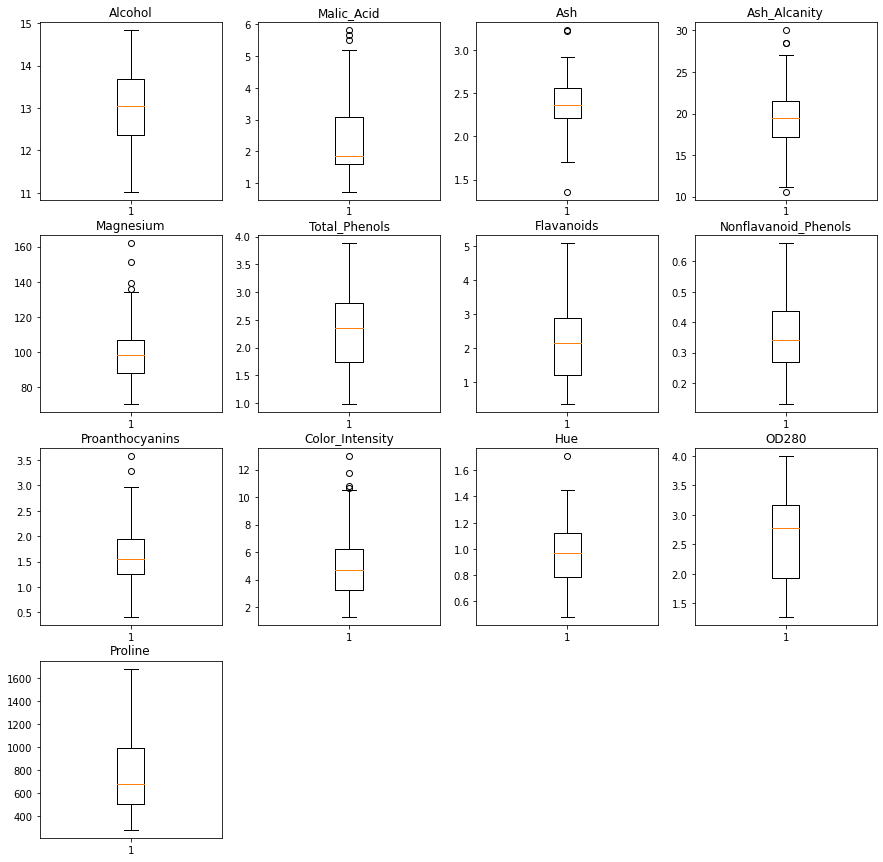

In [8]:
# Ploting box plot to find outliers, if any.
plt.figure(figsize=(15,15))

for i,feature in enumerate(data.columns):
    plt.subplot(4,4,i+1)
    plt.boxplot(data[feature])
    plt.title(feature)

Outliers are detected in Malic_Acid, Ash, Ash_Alcanity, Magnesium, Proanthocyanins, Color_Intensity, and Hue columns.
we can resolve this by imputing the outlier values with IQR.

In [9]:
# Checking the outliers in Malic_Acid column
Q1 = np.percentile(data['Malic_Acid'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Malic_Acid'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Malic_Acid'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

low_limit = Q1 - 1.5 * IQR
upp_limit = Q3 + 1.5 * IQR

outlier = []

for i in data['Malic_Acid']:
    if ((i < low_limit) or ( i > upp_limit )):
        outlier.append(i)

print('The no:of outliers present in the Malic_Acid column:',len(outlier))

The no:of outliers present in the Malic_Acid column: 3


In [10]:
data['Malic_Acid'] = np.where(data['Malic_Acid'] > upp_limit , upp_limit , np.where(data['Malic_Acid'] < low_limit, low_limit, data['Malic_Acid']))

In [11]:
# Checking the outliers in Ash column
Q1 = np.percentile(data['Ash'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Ash'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Ash'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

low_limit = Q1 - 1.5 * IQR
upp_limit = Q3 + 1.5 * IQR

outlier = []

for i in data['Ash']:
    if ((i < low_limit) or ( i > upp_limit )):
        outlier.append(i)

print('The no:of outliers present in the Ash column:',len(outlier))

The no:of outliers present in the Ash column: 3


In [12]:
data['Ash'] = np.where(data['Ash'] > upp_limit , upp_limit , np.where(data['Ash'] < low_limit, low_limit, data['Ash']))

In [13]:
# Checking the outliers in Ash_Alcanity column
Q1 = np.percentile(data['Ash_Alcanity'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Ash_Alcanity'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Ash_Alcanity'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

low_limit = Q1 - 1.5 * IQR
upp_limit = Q3 + 1.5 * IQR

outlier = []

for i in data['Ash_Alcanity']:
    if ((i < low_limit) or ( i > upp_limit )):
        outlier.append(i)

print('The no:of outliers present in the Ash_Alcanity column:',len(outlier))

The no:of outliers present in the Ash_Alcanity column: 4


In [14]:
data['Ash_Alcanity'] = np.where(data['Ash_Alcanity'] > upp_limit , upp_limit , np.where(data['Ash_Alcanity'] < low_limit, low_limit, data['Ash_Alcanity']))

In [15]:
# Checking the outliers in Magnesium column
Q1 = np.percentile(data['Magnesium'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Magnesium'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Magnesium'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

low_limit = Q1 - 1.5 * IQR
upp_limit = Q3 + 1.5 * IQR

outlier = []

for i in data['Magnesium']:
    if ((i < low_limit) or ( i > upp_limit )):
        outlier.append(i)

print('The no:of outliers present in the Magnesium column:',len(outlier))

The no:of outliers present in the Magnesium column: 4


In [16]:
data['Magnesium'] = np.where(data['Magnesium'] > upp_limit , upp_limit , np.where(data['Magnesium'] < low_limit, low_limit, data['Magnesium']))

In [17]:
# Checking the outliers in Proanthocyanins column
Q1 = np.percentile(data['Proanthocyanins'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Proanthocyanins'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Proanthocyanins'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

low_limit = Q1 - 1.5 * IQR
upp_limit = Q3 + 1.5 * IQR

outlier = []

for i in data['Proanthocyanins']:
    if ((i < low_limit) or ( i > upp_limit )):
        outlier.append(i)

print('The no:of outliers present in the Proanthocyanins column:',len(outlier))

The no:of outliers present in the Proanthocyanins column: 2


In [18]:
data['Proanthocyanins'] = np.where(data['Proanthocyanins'] > upp_limit , upp_limit , np.where(data['Proanthocyanins'] < low_limit, low_limit, data['Proanthocyanins']))

In [19]:
# Checking the outliers in Color_Intensity column
Q1 = np.percentile(data['Color_Intensity'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Color_Intensity'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Color_Intensity'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

low_limit = Q1 - 1.5 * IQR
upp_limit = Q3 + 1.5 * IQR

outlier = []

for i in data['Color_Intensity']:
    if ((i < low_limit) or ( i > upp_limit )):
        outlier.append(i)

print('The no:of outliers present in the Color_Intensity column:',len(outlier))

The no:of outliers present in the Color_Intensity column: 4


In [20]:
data['Color_Intensity'] = np.where(data['Color_Intensity'] > upp_limit , upp_limit , np.where(data['Color_Intensity'] < low_limit, low_limit, data['Color_Intensity']))

In [21]:
# Checking the outliers in Hue column
Q1 = np.percentile(data['Hue'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Hue'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Hue'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

low_limit = Q1 - 1.5 * IQR
upp_limit = Q3 + 1.5 * IQR

outlier = []

for i in data['Hue']:
    if ((i < low_limit) or ( i > upp_limit )):
        outlier.append(i)

print('The no:of outliers present in the Hue column:',len(outlier))

The no:of outliers present in the Hue column: 1


In [22]:
data['Hue'] = np.where(data['Hue'] > upp_limit , upp_limit , np.where(data['Hue'] < low_limit, low_limit, data['Hue']))

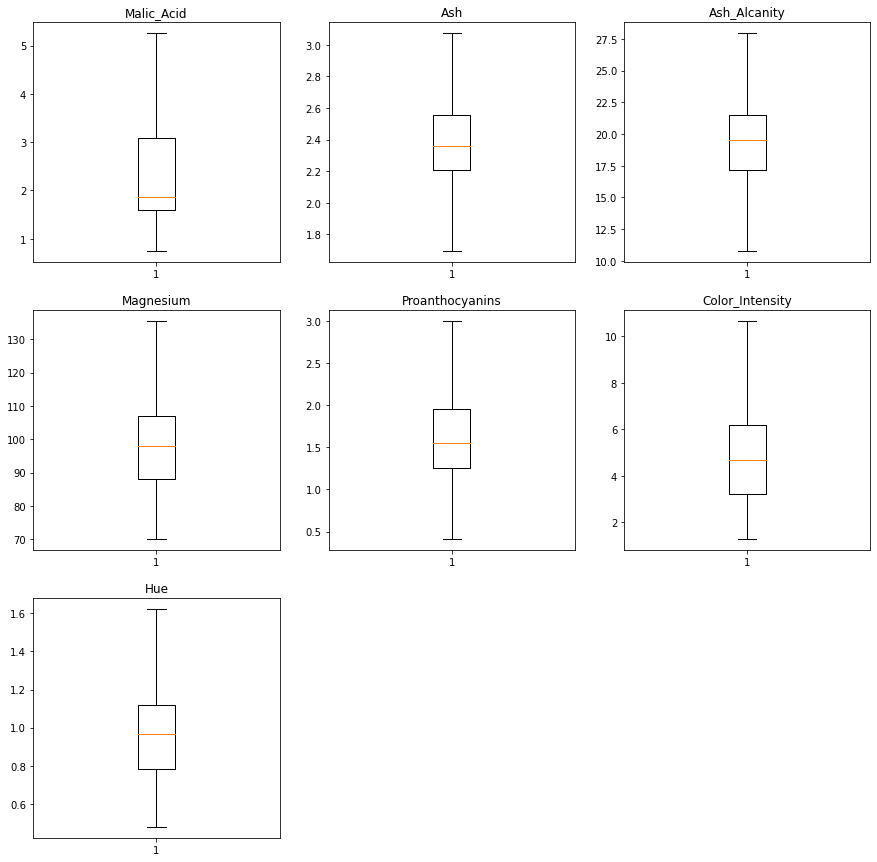

In [23]:
# Re-Checking the data set after handling the outliers
columns = ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Proanthocyanins', 'Color_Intensity', 'Hue']
plt.figure(figsize=(15,15))
for i,feature in enumerate(columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(data[feature])
    plt.title(feature)

Now there are no outliers present in our dataset

In [24]:
df = pd.DataFrame(data.values)
from sklearn.preprocessing import Normalizer
norm =Normalizer()
df_norm = norm.fit_transform(df)

# 2. Try out different clustering models in the wine dataset.

### 1.K-Means Clustering

In [25]:
from sklearn.cluster import KMeans
kMeans = KMeans(random_state=42)
label_kMeans = kMeans.fit_predict(df_norm)
label_kMeans

array([1, 6, 6, 3, 4, 3, 3, 6, 6, 6, 3, 3, 3, 3, 3, 6, 6, 6, 3, 7, 4, 7,
       6, 6, 1, 7, 3, 3, 1, 6, 3, 3, 6, 6, 6, 1, 1, 6, 6, 4, 7, 6, 6, 7,
       1, 6, 6, 6, 6, 6, 3, 3, 6, 3, 1, 6, 1, 3, 3, 4, 7, 5, 7, 5, 2, 7,
       4, 4, 7, 0, 1, 5, 0, 7, 1, 5, 5, 5, 0, 5, 2, 1, 1, 4, 0, 5, 0, 4,
       1, 1, 4, 0, 4, 2, 2, 7, 5, 0, 7, 5, 7, 4, 5, 5, 1, 2, 4, 4, 2, 7,
       0, 2, 4, 5, 5, 5, 4, 2, 5, 4, 4, 2, 2, 5, 5, 5, 5, 0, 2, 7, 0, 0,
       0, 0, 7, 7, 1, 0, 4, 4, 4, 1, 0, 4, 7, 1, 0, 7, 7, 0, 5, 5, 2, 7,
       4, 1, 0, 1, 7, 7, 4, 4, 0, 4, 7, 4, 4, 7, 7, 0, 0, 0, 7, 1, 7, 7,
       7, 4])

Here we obtained 8 clusteres for the data set.

### 2. Hierarchial Clustering

In [26]:
# Here we use Agglomerative Clustering  
from sklearn.cluster import AgglomerativeClustering

In [27]:
# We use the dafault AgglomerativeClustering parameters
hc = AgglomerativeClustering()
label_hc = hc.fit_predict(df_norm)
label_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Each number represnt the respective cluster. So we can see model created two clusteres.

# 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

## A. K-Means Clustering

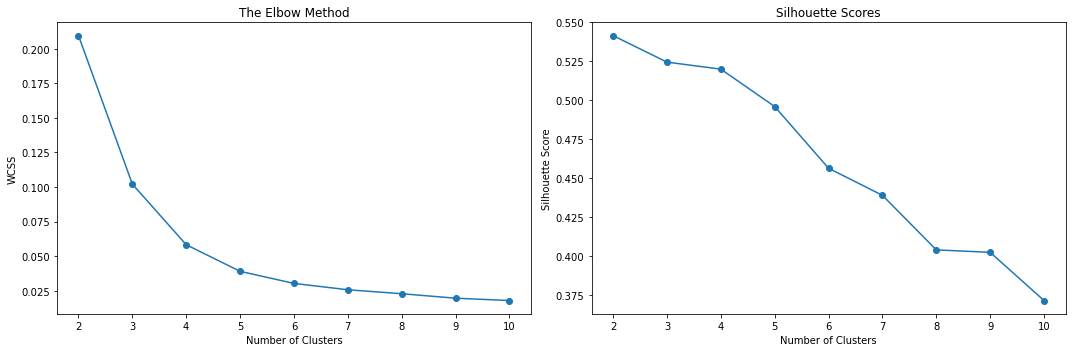

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Use elbow method and silhouette score to get optimal number of clusters
wcss = []
scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    model=kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    labels = model.predict(df_norm)
    sil_score = silhouette_score(df_norm,labels)
    scores.append(sil_score)

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(range(2,11),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(range(2,11),scores,'-o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()

plt.show() 

In [29]:
# from the above graphs we can find that 3 is the optimum number of clusters that we can make using K-Means

In [30]:
# we set the parameteres n_clusters(number of clusters to form), init(Method for initialization) and random_state(control the random number generator used)
kMeans = KMeans(n_clusters = 3,  init='k-means++', random_state=42) 
labels_kMeans = kMeans.fit_predict(df_norm)
print('The predicted clusteres label for our data:')
labels_kMeans

The predicted clusteres label for our data:


array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

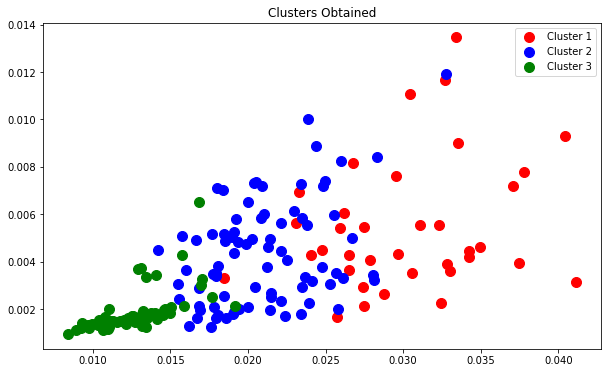

In [39]:
# Ploting graph to show the clusteres
plt.figure(figsize = (10, 6))

plt.scatter(df_norm[labels_kMeans == 0,0], df_norm[labels_kMeans == 0,1], s = 100, c = 'Red', label = 'Cluster 1')
plt.scatter(df_norm[labels_kMeans == 1,0], df_norm[labels_kMeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_norm[labels_kMeans == 2,0], df_norm[labels_kMeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters Obtained')

plt.legend()
plt.show()

## B. Hierarchical Clustering 

In [33]:
import scipy.cluster.hierarchy as sch

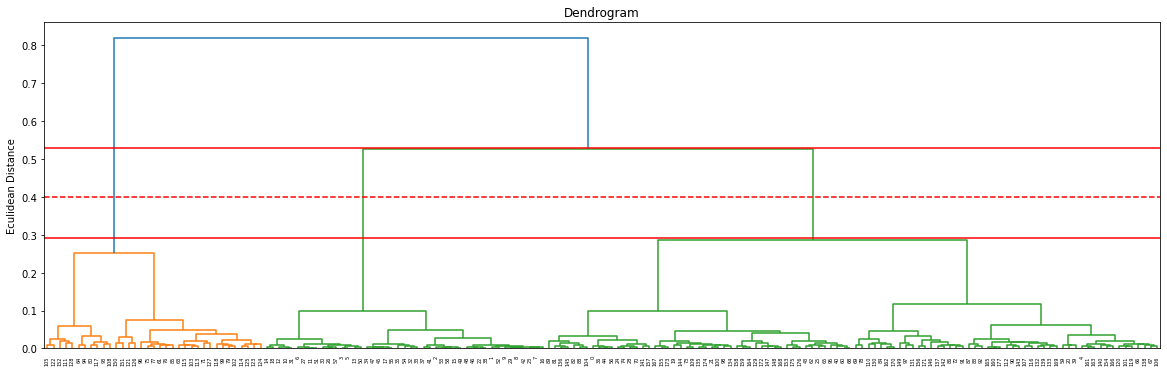

In [34]:
# With the help of dendrogram we can find the optimum no.of clusters
plt.figure(figsize = (20, 6))

dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'ward'))

plt.title('Dendrogram')
plt.ylabel('Eculidean Distance')
plt.hlines(.4,0,1800,color ='red', linestyle ='dashed')
plt.hlines(.53,0,1800,color ='red')
plt.hlines(.29,0,1800,color ='red')

plt.show()

In [35]:
# We can find that the line intersect at 3 points(the dashed line) so we can take 3 as our optimum no.of clusteres

In [36]:
# We set parameteres n_clusters, affinity(Metric used to compute the linkage) and linkage(Which linkage criterion to use).
hc = AgglomerativeClustering(n_clusters= 3, affinity='euclidean', linkage='ward')
labels_hc = hc.fit_predict(df_norm)
print('The predicted clusteres label for our data:')
labels_hc

The predicted clusteres label for our data:


array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [37]:
# Ploting graph to show the clusteres

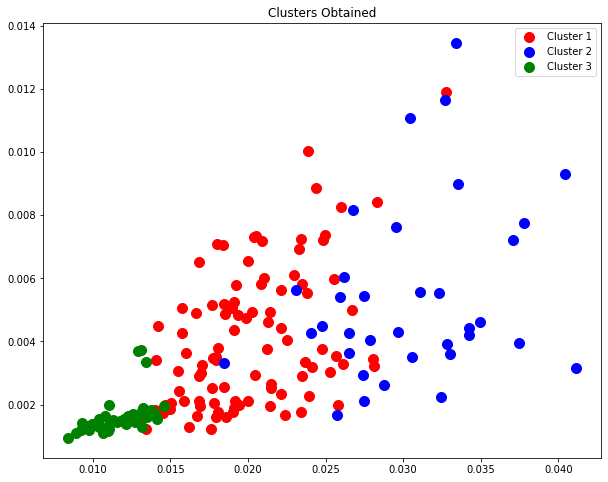

In [38]:
plt.figure(figsize = (10, 8))

plt.scatter(df_norm[labels_hc == 0,0], df_norm[labels_hc == 0,1], s = 100, c = 'Red', label = 'Cluster 1')
plt.scatter(df_norm[labels_hc == 1,0], df_norm[labels_hc == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_norm[labels_hc == 2,0], df_norm[labels_hc == 2,1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters Obtained')

plt.legend()
plt.show()